<a href="https://colab.research.google.com/github/Catarinatorres/Trabalho2Unidade1_Analisederedes_UFRN/blob/main/Analisederedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the graphml file

In [2]:
# import usefull packages
import pandas as pd
import networkx as nx

In [83]:
#open the csv file, and select the usefull columns
df_flights = pd.read_csv('/content/drive/MyDrive/anac.csv', usecols= [0, 5,6,7,8,9,10,11,12,13,14,15,16,17])
#dropna to exclud data of non brazilian flights
df_flights = df_flights.dropna()

In [82]:
#open the csv file, and select the usefull columns
df_airports = pd.read_csv('/content/drive/MyDrive/airports.csv', usecols=[0,1,2,3,4,5])
#dropna to exclud data of non brazilian flights
df_airports = df_airports.dropna()

In [63]:
# Create graph
G = nx.Graph()
# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['code'],
               name=row['name'],
               region=row['region']
               )
print(G.nodes)    
# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation',
]].dropna()
df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()
for index, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

# Export to graphml
nx.write_graphml(G, '/content/air_traffic.graphml')

['SBCF', 'SBGL', 'SBGR', 'SSUM', 'SNBG', 'SSBG', 'SBCV', 'SBLP', 'SBSV', 'SNGI', 'SNTF', 'SBAR', 'SBMO', 'SBPL', 'SNBR', 'SNVR', 'SBKP', 'SBBV', 'SBFL', 'SBPA', '1AON', 'SBAA', 'SBAS', 'SBAU', 'SBBE', 'SBBH', 'SBBR', 'SBCG', 'SBCH', 'SBCJ', 'SBCT', 'SBCY', 'SBDN', 'SBEG', 'SBFC', 'SBFZ', 'SBGO', 'SBIL', 'SBIZ', 'SBJP', 'SBJV', 'SBLO', 'SBMA', 'SBMC', 'SBMQ', 'SBNF', 'SBNT', 'SBPJ', 'SBPN', 'SBPS', 'SBPV', 'SBRF', 'SBRJ', 'SBRP', 'SBSJ', 'SBSL', 'SBSM', 'SBSP', 'SBSR', 'SBTC', 'SBTE', 'SBTU', 'SBUG', 'SBUL', 'SBUR', 'SBVG', 'SBVH', 'SBVT', 'SDAG', 'SNDC', 'SNDM', 'SNTO', 'SSCK', 'SSEP', 'SSER', 'SSHZ', 'SSLT', 'SSPB', 'SSUW', 'SSZR', 'SWFX', 'SWGI', 'SWJI', 'SWKK', 'SWKN', 'SWNQ', 'SWPQ', 'SBBI', 'SBCX', 'SBFI', 'SBSN', 'SDAN', 'SDCO', 'SDUB', 'SNFE', 'SWGN', 'SBCA', 'SBCM', 'SBCR', 'SBME', 'SBML', 'SBPK', 'SBAQ', 'SDVG', 'SBBT', 'SNRU', 'SBMN', 'SBBU', 'SBMG', 'SSTD', 'SBTD', 'SBRG', 'SNOX', 'SNTI', 'SBHT', 'SBIH', 'SBMD', 'SBFN', 'SBIP', 'SBJF', 'SBKG', 'SBMK', 'SBPB', 'SBQV', 'SBTB',

In [ ]:
!pip install nxviz=='0.6.3'

In [54]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns

In [64]:
# source: /content/air_traffic.graphml
G = nx.read_graphml('/content/air_traffic.graphml')
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))



The network has 496 nodes and 4403 edges


In [65]:
# Just look how the nodes are represented in the Network
G.nodes(data=True)

NodeDataView({'SBCF': {'name': 'CONFINS', 'region': 'SUDESTE'}, 'SBGL': {'name': 'RIO DE JANEIRO', 'region': 'SUDESTE'}, 'SBGR': {'name': 'GUARULHOS', 'region': 'SUDESTE'}, 'SSUM': {'name': 'UMUARAMA', 'region': 'SUL'}, 'SNBG': {'name': 'BAIXO GUANDU', 'region': 'SUDESTE'}, 'SSBG': {'name': 'BENTO GONÇALVES', 'region': 'SUL'}, 'SBCV': {'name': 'CARAVELAS', 'region': 'NORDESTE'}, 'SBLP': {'name': 'BOM JESUS DA LAPA', 'region': 'NORDESTE'}, 'SBSV': {'name': 'SALVADOR', 'region': 'NORDESTE'}, 'SNGI': {'name': 'GUANAMBI', 'region': 'NORDESTE'}, 'SNTF': {'name': 'TEIXEIRA DE FREITAS', 'region': 'NORDESTE'}, 'SBAR': {'name': 'ARACAJU', 'region': 'NORDESTE'}, 'SBMO': {'name': 'RIO LARGO', 'region': 'NORDESTE'}, 'SBPL': {'name': 'PETROLINA', 'region': 'NORDESTE'}, 'SNBR': {'name': 'BARREIRAS', 'region': 'NORDESTE'}, 'SNVR': {'name': 'VERA CRUZ', 'region': 'NORDESTE'}, 'SBKP': {'name': 'CAMPINAS', 'region': 'SUDESTE'}, 'SBBV': {'name': 'BOA VISTA', 'region': 'NORTE'}, 'SBFL': {'name': 'FLORIANÓ

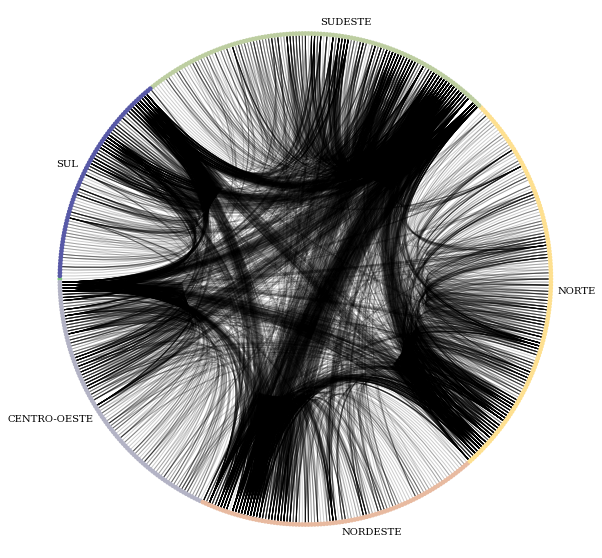

In [66]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False, figsize = (10,10), radiu)

                  
# Draw c to the screen
c.draw()



# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

NodeDataView({'KDFW': None, 'KJFK': None, 'KMIA': None, 'SBCF': None, 'SBGL': None, 'SBGR': None, 'SGAS': None, 'SSUM': None, 'SUMU': None, 'nan': None, 'SNBG': None, 'KMCO': None, 'SSBG': None, 'SBCV': None, 'SBLP': None, 'SBSV': None, 'SNGI': None, 'SNTF': None, 'SBAR': None, 'SBMO': None, 'SBPL': None, 'SNBR': None, 'SNVR': None, 'CYYZ': None, 'DTTA': None, 'UUEE': None, 'GOOY': None, 'LFPG': None, 'SBKP': None, 'SOCA': None, 'SCEL': None, 'SBBV': None, 'SVPR': None, 'MMMX': None, 'MMUN': None, 'SPIM': None, 'SAEZ': None, 'SBFL': None, 'LEMD': None, 'SABE': None, 'SACO': None, 'SBPA': None, 'SAAR': None, 'SKBO': None, 'LIMC': None, 'LIRF': None, 'EGKK': None, '1AON': None, 'SBAA': None, 'SBAS': None, 'SBAU': None, 'SBBE': None, 'SBBH': None, 'SBBR': None, 'SBCG': None, 'SBCH': None, 'SBCJ': None, 'SBCT': None, 'SBCY': None, 'SBDN': None, 'SBEG': None, 'SBFC': None, 'SBFZ': None, 'SBGO': None, 'SBIL': None, 'SBIZ': None, 'SBJP': None, 'SBJV': None, 'SBLO': None, 'SBMA': None, 'SBMC':

In [67]:
nx.attribute_assortativity_coefficient(G,"region")

0.36715369332586867

In [68]:
e = nx.attribute_mixing_matrix(G,'region')
e

array([[6.90438337e-02, 4.00863048e-02, 1.22643652e-02, 0.00000000e+00,
        1.31728367e-02, 7.26777197e-03],
       [4.00863048e-02, 1.74426527e-01, 3.44083579e-02, 1.13558937e-04,
        5.59845560e-02, 2.78219396e-02],
       [1.22643652e-02, 3.44083579e-02, 5.22371111e-02, 0.00000000e+00,
        1.06745401e-02, 2.22575517e-02],
       [0.00000000e+00, 1.13558937e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.31728367e-02, 5.59845560e-02, 1.06745401e-02, 0.00000000e+00,
        7.88099023e-02, 2.07812855e-02],
       [7.26777197e-03, 2.78219396e-02, 2.22575517e-02, 0.00000000e+00,
        2.07812855e-02, 1.35816489e-01]])

In [69]:
# sum of all values of matrix must be 1.0
np.sum(e)

1.0

In [70]:
# "a" and "b" are the fraction of each type of end of an
# edge that is attached to vertices of specific group
a = np.sum(e, axis=1)
b = np.sum(e, axis=0)

display(a)
display(b)

array([1.41835112e-01, 3.32841245e-01, 1.31841926e-01, 1.13558937e-04,
       1.79423121e-01, 2.13945037e-01])

array([1.41835112e-01, 3.32841245e-01, 1.31841926e-01, 1.13558937e-04,
       1.79423121e-01, 2.13945037e-01])

In [71]:
# trace of mixing matrix
tr_e = np.trace(e)
tr_e

0.5103338632750398

In [72]:
# sum of squared matrix
multi_e = np.sum(np.matmul(e,e))

In [73]:
# assortativity metric
r = (tr_e - multi_e)/(1 - multi_e)
r

0.36715369332586867

In [74]:
# check if values are the same
assert(r == nx.attribute_assortativity_coefficient(G,"region"))

In [75]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


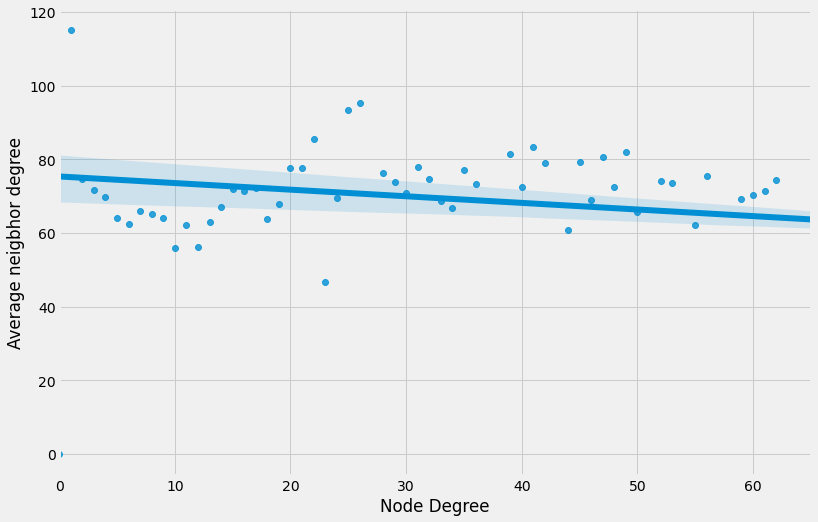

In [76]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [77]:
nx.degree_assortativity_coefficient(G)

-0.2022151039385204

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [81]:
nx.is_connected(G)

False

In [79]:
# source: /content/air_trafficX.graphml
G = nx.read_graphml('air_traffic.graphml')
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

#SBCZ Airport - Cruzeiro do Sul/AC to SBBG Airport - Bagé/RS
print(nx.shortest_path(G, 'SBCZ', 'SBBG'))
print(nx.shortest_path_length(G, 'SBCZ', 'SBBG'))
#SBBG Airport - Bagé/RS to  SNKK Airport Caicó/RN
print(nx.shortest_path(G, 'SBBG', 'SNKK'))
print(nx.shortest_path_length(G, 'SBBG', 'SNKK'))
#SNKK Airport Caicó/RN to SWKN Airport Caldas Novas/GO
print(nx.shortest_path(G, 'SNKK', 'SWKN'))
#SWKN Airport Caldas Novas/GO to SBAU Airport Araçatuba/SP
print(nx.shortest_path(G, 'SWKN', 'SBAU'))


The network has 496 nodes and 4403 edges
['SBCZ', 'SBGL', 'SBBG']
2
['SBBG', 'SBGL', 'SBJP', 'SNKK']
3
['SNKK', 'SBNT', 'SWKN']
['SWKN', 'SBCF', 'SBAU']


In [ ]:
nx.cycle_basis(SUL)

In [80]:
subgrafos = [G.subgraph(s) for s in nx.connected_components(G)]
print(len(subgrafos))

#nx.draw(
 #   subgrafos[0],
  #  with_labels = True,
   # node_size=900,
    #node_color='red'
#)
print(G.nodes)

5
['SBCF', 'SBGL', 'SBGR', 'SSUM', 'SNBG', 'SSBG', 'SBCV', 'SBLP', 'SBSV', 'SNGI', 'SNTF', 'SBAR', 'SBMO', 'SBPL', 'SNBR', 'SNVR', 'SBKP', 'SBBV', 'SBFL', 'SBPA', '1AON', 'SBAA', 'SBAS', 'SBAU', 'SBBE', 'SBBH', 'SBBR', 'SBCG', 'SBCH', 'SBCJ', 'SBCT', 'SBCY', 'SBDN', 'SBEG', 'SBFC', 'SBFZ', 'SBGO', 'SBIL', 'SBIZ', 'SBJP', 'SBJV', 'SBLO', 'SBMA', 'SBMC', 'SBMQ', 'SBNF', 'SBNT', 'SBPJ', 'SBPN', 'SBPS', 'SBPV', 'SBRF', 'SBRJ', 'SBRP', 'SBSJ', 'SBSL', 'SBSM', 'SBSP', 'SBSR', 'SBTC', 'SBTE', 'SBTU', 'SBUG', 'SBUL', 'SBUR', 'SBVG', 'SBVH', 'SBVT', 'SDAG', 'SNDC', 'SNDM', 'SNTO', 'SSCK', 'SSEP', 'SSER', 'SSHZ', 'SSLT', 'SSPB', 'SSUW', 'SSZR', 'SWFX', 'SWGI', 'SWJI', 'SWKK', 'SWKN', 'SWNQ', 'SWPQ', 'SBBI', 'SBCX', 'SBFI', 'SBSN', 'SDAN', 'SDCO', 'SDUB', 'SNFE', 'SWGN', 'SBCA', 'SBCM', 'SBCR', 'SBME', 'SBML', 'SBPK', 'SBAQ', 'SDVG', 'SBBT', 'SNRU', 'SBMN', 'SBBU', 'SBMG', 'SSTD', 'SBTD', 'SBRG', 'SNOX', 'SNTI', 'SBHT', 'SBIH', 'SBMD', 'SBFN', 'SBIP', 'SBJF', 'SBKG', 'SBMK', 'SBPB', 'SBQV', 'SBTB